In [54]:
from IPython.display import IFrame
import folium
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from branca.colormap import LinearColormap, StepColormap, linear
import numpy as np

In [2]:
DemocraticQualityData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,B,M")
DemocraticQualityData.head()

,country,year,Democratic Quality
0,Afghanistan,2008,-1.929690
1,Afghanistan,2009,-2.044093
2,Afghanistan,2010,-1.991810
3,Afghanistan,2011,-1.919018
4,Afghanistan,2012,-1.842996


In [3]:
# Get the more recent Democratic Quality score --> should we take the mean ?
DemocraticQualityData = DemocraticQualityData.sort_values('year', ascending=False)\
    .groupby("country").first()

In [4]:
DemocraticQualityData = DemocraticQualityData.drop('year', axis=1)
DemocraticQualityData.head()

,Democratic Quality
country,
Afghanistan,-1.917693
Albania,0.208456
Algeria,-1.008262
Angola,-0.739363
Argentina,0.381370


In [5]:
#FIPS_codes = pd.read_csv('../Data/fips-country-codes.csv', usecols = ['Name', 'FIPS 10-4'])
#print(FIPS_codes)

In [6]:
FIPS_codes = pd.read_csv('../Data/fipscountries.csv', usecols = ['country', 'fips'])\
    .rename(index=str, columns={'fips':'FIPS'})
FIPS_codes.head()

,FIPS,country
0,AN,Andorra
1,AE,United Arab Emirates
2,AF,Afghanistan
3,AC,Antigua and Barbuda
4,AV,Anguilla


In [7]:
DemocraticQuality_byFIPS = DemocraticQualityData.merge(FIPS_codes, left_on='country', right_on='country')
DemocraticQuality_byFIPS.head()

,country,Democratic Quality,FIPS
0,Afghanistan,-1.917693,AF
1,Albania,0.208456,AL
2,Algeria,-1.008262,AG
3,Angola,-0.739363,AO
4,Argentina,0.381370,AR


In [8]:
DemocraticQuality_byFIPS['Democratic Quality'].describe()

count    155.000000
mean      -0.167136
std        0.877713
min       -2.448228
25%       -0.738321
50%       -0.270198
75%        0.524382
max        1.467140
Name: Democratic Quality, dtype: float64

In [9]:
# Split DemocraticQuality index into bins in order to group countries with similar index
DemocraticQuality_byFIPS['Democratic Quality binned']=pd.cut(DemocraticQuality_byFIPS['Democratic Quality'],\
                                                             bins = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
DemocraticQuality_byFIPS.head()

,country,Democratic Quality,FIPS,Democratic Quality binned
0,Afghanistan,-1.917693,AF,"(-2.0, -1.5]"
1,Albania,0.208456,AL,"(0.0, 0.5]"
2,Algeria,-1.008262,AG,"(-1.5, -1.0]"
3,Angola,-0.739363,AO,"(-1.0, -0.5]"
4,Argentina,0.381370,AR,"(0.0, 0.5]"


In [10]:
list_by_bin = DemocraticQuality_byFIPS.groupby('Democratic Quality binned')['FIPS'].apply(list)

binned_DemocraticQuality = pd.DataFrame(list_by_bin)
binned_DemocraticQuality = binned_DemocraticQuality.reset_index()
binned_DemocraticQuality = binned_DemocraticQuality.rename(index=str, columns={'Democratic Quality binned':'Democratic_Quality_binned'})

binned_DemocraticQuality.head()

,Democratic_Quality_binned,FIPS
0,"(-2.5, -2.0]","[SO, OD, SU, SY, YM]"
1,"(-2.0, -1.5]","[AF, ET, IZ, LY, PK]"
2,"(-1.5, -1.0]","[AG, AJ, BA, CT, CD, CH, EG, IR, LE, NI, RS, S..."
3,"(-1.0, -0.5]","[AO, AM, BG, BO, BY, CM, CU, DJ, GB, GV, HA, I..."
4,"(-0.5, 0.0]","[BL, BK, UV, CB, CO, CN, EC, GG, GT, GY, HO, I..."


In [11]:
binned_DemocraticQuality.to_csv('binned_DemocraticQuality_FIPS', header=False, index=False)

In [12]:
averageTone_FIPS = pd.read_csv('../Data/avgToneBySourceLocation_table.csv')
averageTone_FIPS.head()

,FIPS,AverageTone
0,IT,-1.226632
1,WA,-2.156439
2,CM,-2.944971
3,ML,-1.462604
4,MG,-0.242109


In [13]:
DemocraticQuality_AvgTone_byFIPS = DemocraticQuality_byFIPS.merge(averageTone_FIPS, left_on='FIPS', right_on='FIPS')
DemocraticQuality_AvgTone_byFIPS.head()

,country,Democratic Quality,FIPS,Democratic Quality binned,AverageTone
0,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",-3.374755
1,Albania,0.208456,AL,"(0.0, 0.5]",-1.843297
2,Algeria,-1.008262,AG,"(-1.5, -1.0]",-2.045113
3,Angola,-0.739363,AO,"(-1.0, -0.5]",-1.026558
4,Argentina,0.381370,AR,"(0.0, 0.5]",-1.964747


In [14]:
DemocraticQuality_AvgTone_mean=DemocraticQuality_AvgTone_byFIPS.groupby('Democratic Quality binned')['AverageTone']\
    .apply(np.mean)
DemocraticQuality_AvgTone_mean.head()

Democratic Quality binned
(-2.5, -2.0]   -2.631084
(-2.0, -1.5]   -2.574403
(-1.5, -1.0]   -1.635941
(-1.0, -0.5]   -1.562412
(-0.5, 0.0]    -1.735919
Name: AverageTone, dtype: float64

Text(0, 0.5, 'Average Tone')

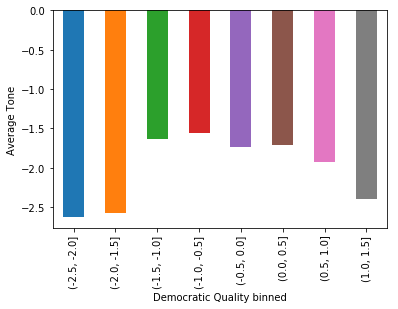

In [15]:
DemocraticQuality_AvgTone_mean.plot.bar()
plt.ylabel('Average Tone')

In [16]:
print('The Pearson correlation between Democratic Quality and Average Tone is : ')
print(DemocraticQuality_AvgTone_byFIPS['Democratic Quality'].corr(DemocraticQuality_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Democratic Quality and Average Tone is : 
-0.07340862656961676


In [17]:
# Observe for several EventRootCodes, the average tone in each country
avgTone_FIPS_EventRootCode = pd.read_csv('../Data/avgTone_FIPS_EventRootCode.csv')\
    .rename(index=str, columns={'f0_':'AvgTone'})
avgTone_FIPS_EventRootCode.head()

,FIPS,EventRootCode,AvgTone
0,TU,5,0.641469
1,JO,5,0.100875
2,SC,5,2.567115
3,GP,5,-0.572004
4,PC,5,-1.619279


In [18]:
# Try to find a link with the democratic index in the country
avgTone_EventRootCode_Demo = DemocraticQuality_byFIPS\
    .merge(avgTone_FIPS_EventRootCode, left_on='FIPS', right_on='FIPS')
avgTone_EventRootCode_Demo.head()

,country,Democratic Quality,FIPS,Democratic Quality binned,EventRootCode,AvgTone
0,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",5,-0.896783
1,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",6,-2.208447
2,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",14,-5.137769
3,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",15,-3.055255
4,Afghanistan,-1.917693,AF,"(-2.0, -1.5]",19,-6.547427


/anaconda3/envs/adaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


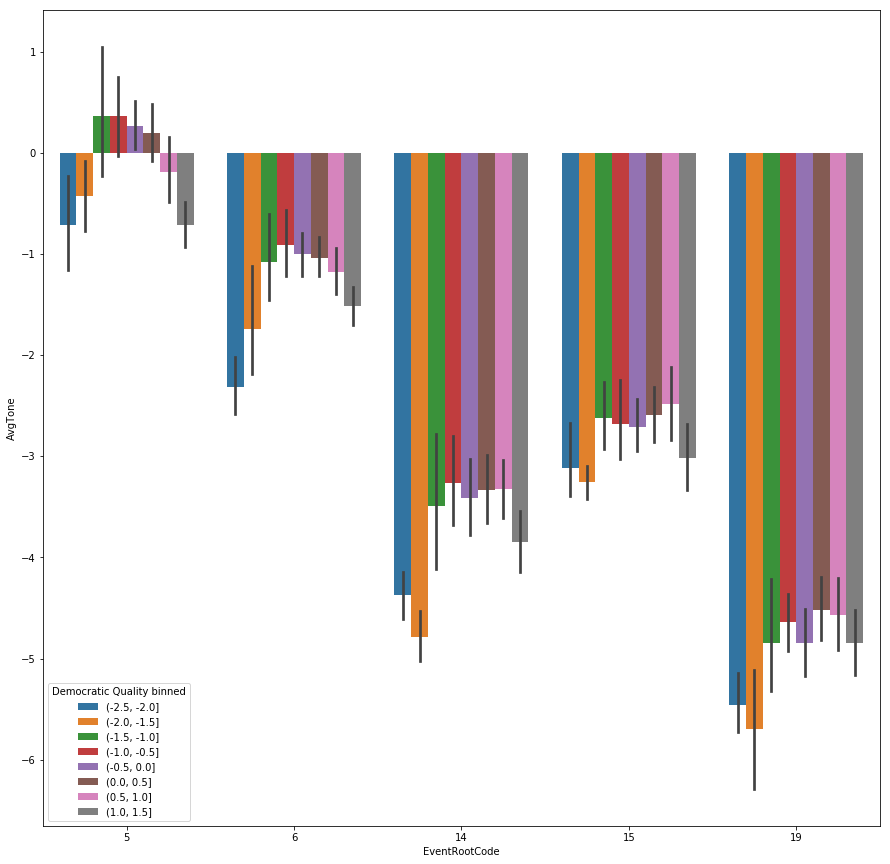

In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
sns.barplot(x="EventRootCode", y="AvgTone", hue="Democratic Quality binned", data=avgTone_EventRootCode_Demo)

In [20]:
avgTone_EventRootCode_Demo_binned = avgTone_EventRootCode_Demo.groupby(['Democratic Quality binned', 'EventRootCode'])['AvgTone'].apply(np.mean)

avgTone_EventRootCode_Demo_binned = pd.DataFrame(avgTone_EventRootCode_Demo_binned).unstack()
avgTone_EventRootCode_Demo_binned.head()

AvgTone                                        
EventRootCode                    5         6         14        15        19
Democratic Quality binned                                                  
(-2.5, -2.0]              -0.710548 -2.314746 -4.368456 -3.113141 -5.463931
(-2.0, -1.5]              -0.426933 -1.744307 -4.785505 -3.253414 -5.701234
(-1.5, -1.0]               0.362697 -1.084794 -3.488653 -2.620177 -4.845885
(-1.0, -0.5]               0.359623 -0.911364 -3.266903 -2.678450 -4.639899
(-0.5, 0.0]                0.267157 -1.005996 -3.415420 -2.711075 -4.842796

In [21]:
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 20
#plt.rcParams["figure.figsize"] = fig_size

#avgTone_EventRootCode_Demo_binned.unstack(level=0).plot(kind='bar', subplots=True)
#fig = plt.gcf()
#fig.savefig("democratic_event_avgTone.png")

In [22]:
#GovernmentConfidenceData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,B,L")\
 #   .sort_values('year', ascending=False)\
  #  .groupby("country").first()\
   # .drop('year', axis=1)\
    #.dropna()
#GovernmentConfidenceData.head()

In [23]:
# Observe the link with Confidence in the national government
GovernmentConfidenceData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,L")\
    .groupby('country')\
    .apply(np.mean)\
    .dropna()
GovernmentConfidenceData.head()

,Confidence in national government
country,
Afghanistan,0.400442
Albania,0.409726
Angola,0.397389
Argentina,0.400587
Armenia,0.302084


In [24]:
GovernmentConfidenceData_byFIPS = GovernmentConfidenceData.merge(FIPS_codes, left_on='country', right_on='country')
GovernmentConfidenceData_byFIPS.head()

,country,Confidence in national government,FIPS
0,Afghanistan,0.400442,AF
1,Albania,0.409726,AL
2,Angola,0.397389,AO
3,Argentina,0.400587,AR
4,Armenia,0.302084,AM


In [25]:
GovernmentConfidenceData_byFIPS['Confidence in national government'].describe()

count    146.000000
mean       0.499504
std        0.181166
min        0.164084
25%        0.364060
50%        0.469831
75%        0.602204
max        0.961462
Name: Confidence in national government, dtype: float64

In [26]:
GovernmentConfidence_AvgTone_byFIPS = GovernmentConfidenceData_byFIPS.merge(averageTone_FIPS, left_on='FIPS', right_on='FIPS')
GovernmentConfidence_AvgTone_byFIPS.head()

,country,Confidence in national government,FIPS,AverageTone
0,Afghanistan,0.400442,AF,-3.374755
1,Albania,0.409726,AL,-1.843297
2,Angola,0.397389,AO,-1.026558
3,Argentina,0.400587,AR,-1.964747
4,Armenia,0.302084,AM,-1.528395


In [27]:
print('The Pearson correlation between Government confidence and Average Tone is : ')
print(GovernmentConfidence_AvgTone_byFIPS['Confidence in national government']\
      .corr(GovernmentConfidence_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Government confidence and Average Tone is : 
0.0985741722552275


In [28]:
# Observe the link with the corruption
CorruptionData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,I")\
    .groupby('country')\
    .apply(np.mean)\
    .dropna()
CorruptionData.head()

,Perceptions of corruption
country,
Afghanistan,0.826794
Albania,0.859691
Algeria,0.661478
Angola,0.867018
Argentina,0.844038


In [29]:
CorruptionData_byFIPS = CorruptionData.merge(FIPS_codes, left_on='country', right_on='country')
CorruptionData_byFIPS.head()

,country,Perceptions of corruption,FIPS
0,Afghanistan,0.826794,AF
1,Albania,0.859691,AL
2,Algeria,0.661478,AG
3,Angola,0.867018,AO
4,Argentina,0.844038,AR


In [30]:
CorruptionData_byFIPS['Perceptions of corruption'].describe()

count    152.000000
mean       0.748378
std        0.174332
min        0.183798
25%        0.701091
50%        0.798155
75%        0.858603
max        0.956521
Name: Perceptions of corruption, dtype: float64

In [31]:
Corruption_AvgTone_byFIPS = CorruptionData_byFIPS.merge(averageTone_FIPS, left_on='FIPS', right_on='FIPS')
Corruption_AvgTone_byFIPS.head()

,country,Perceptions of corruption,FIPS,AverageTone
0,Afghanistan,0.826794,AF,-3.374755
1,Albania,0.859691,AL,-1.843297
2,Algeria,0.661478,AG,-2.045113
3,Angola,0.867018,AO,-1.026558
4,Argentina,0.844038,AR,-1.964747


In [32]:
print('The Pearson correlation between Corruption perception and Average Tone is : ')
print(Corruption_AvgTone_byFIPS['Perceptions of corruption']\
      .corr(Corruption_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Corruption perception and Average Tone is : 
0.08604790179045836


In [33]:
# Country instability analysis
GoldsteinScaleData = pd.read_csv('../Data/AvgGoldsteinScale_FIPS_table.csv')
GoldsteinScaleData.head()

,FIPS,GoldsteinScale
0,MD,0.783230
1,JE,0.242012
2,EC,1.119071
3,AN,1.866339
4,WS,0.561354


In [34]:
GoldsteinScaleData = FIPS_codes.merge(GoldsteinScaleData, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData.head()

,FIPS,country,GoldsteinScale
0,AN,Andorra,1.866339
1,AE,United Arab Emirates,1.057767
2,AF,Afghanistan,-0.667173
3,AC,Antigua and Barbuda,1.287779
4,AV,Anguilla,2.246747


In [72]:
def normalize_series(series):
    abs_series = series.abs() #Absolute values of the whole column
    max_value = abs_series.max() # Max of the absolute values
    
    return series/max_value

In [73]:
GoldsteinScaleData.loc[GoldsteinScaleData['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData.loc[GoldsteinScaleData['country']=='Serbia', 'country'] = 'Republic of Serbia'

GoldsteinScaleData['GoldsteinScale'] = normalize_series(GoldsteinScaleData['GoldsteinScale'])

GoldsteinScale_dict = GoldsteinScaleData.set_index('country')['GoldsteinScale'].to_dict()

In [74]:
world_borders = json.load(open('../Data/world_borders.topojson.json'))

In [75]:
def color_function(feature, data, color_fun):
    value = data.get(feature['properties']['name'])
    if value is None:
        return '#8c8c8c' # MISSING -> gray
    else:
        return color_fun(value)

In [86]:
world_map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)

# Defining a style function to color the map and the borders
style_func=lambda feature: {'fillColor': '#990033','color' : 'black','weight' : 2 }

# Using a GeoJsonTooltip to display cantons' name when mouse is over them
tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top' \
                          )

# Load border information on the map
folium.TopoJson(world_borders,\
                object_path='objects.countries1',\
                style_function=style_func,\
                tooltip=tool, \
                overlay=False \
               ) \
      .add_to(world_map)

color_scale_Goldstein = LinearColormap(['red','blue'], \
                                     vmin = -1, \
                                     vmax = 1 \
                                    )

#FIRST MAP
folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=folium.GeoJsonTooltip(fields=['name'],aliases=['Country: '], sticky=True, style="font-family: Arial; color: black;", \
                           opacity=0.8, direction='top'),
    name = 'Average Goldstein Scale',
    ).add_to(world_map)

color_scale_Goldstein.caption = 'Average Goldstein Scale per country (full date range)'
world_map.add_child(color_scale_Goldstein)
folium.LayerControl().add_to(world_map)
world_map  

world_map.save('GoldsteinMap_full.html')

IFrame(src='GoldsteinMap_full.html', width=900, height=700)

In [82]:
# Year 2014
GoldsteinScaleData_2014 = pd.read_csv('../Data/2014_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2014 = FIPS_codes.merge(GoldsteinScaleData_2014, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2014.loc[GoldsteinScaleData_2014['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2014.loc[GoldsteinScaleData_2014['country']=='Serbia', 'country'] = 'Republic of Serbia'

GoldsteinScaleData_2014['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2014['GoldsteinScale'])
GoldsteinScale_dict_2014 = GoldsteinScaleData_2014.set_index('country')['GoldsteinScale'].to_dict()


# Year 2015
GoldsteinScaleData_2015 = pd.read_csv('../Data/2015_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2015 = FIPS_codes.merge(GoldsteinScaleData_2015, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2015.loc[GoldsteinScaleData_2015['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2015.loc[GoldsteinScaleData_2015['country']=='Serbia', 'country'] = 'Republic of Serbia'

GoldsteinScaleData_2015['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2015['GoldsteinScale'])
GoldsteinScale_dict_2015 = GoldsteinScaleData_2015.set_index('country')['GoldsteinScale'].to_dict()

#Year 2016
GoldsteinScaleData_2016 = pd.read_csv('../Data/2016_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2016 = FIPS_codes.merge(GoldsteinScaleData_2016, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2016.loc[GoldsteinScaleData_2016['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2016.loc[GoldsteinScaleData_2016['country']=='Serbia', 'country'] = 'Republic of Serbia'


GoldsteinScaleData_2016['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2016['GoldsteinScale'])
GoldsteinScale_dict_2016 = GoldsteinScaleData_2016.set_index('country')['GoldsteinScale'].to_dict()

# Year 2017
GoldsteinScaleData_2017 = pd.read_csv('../Data/2017_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2017 = FIPS_codes.merge(GoldsteinScaleData_2017, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2017.loc[GoldsteinScaleData_2017['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2017.loc[GoldsteinScaleData_2017['country']=='Serbia', 'country'] = 'Republic of Serbia'

GoldsteinScaleData_2017['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2017['GoldsteinScale'])
GoldsteinScale_dict_2017 = GoldsteinScaleData_2017.set_index('country')['GoldsteinScale'].to_dict()

# Year 2018
GoldsteinScaleData_2018 = pd.read_csv('../Data/2018_GoldsteinScale_FIPS_table.csv')
GoldsteinScaleData_2018 = FIPS_codes.merge(GoldsteinScaleData_2018, left_on='FIPS', right_on='FIPS')
GoldsteinScaleData_2018.loc[GoldsteinScaleData_2018['country']=='United States', 'country'] = 'United States of America'
GoldsteinScaleData_2018.loc[GoldsteinScaleData_2018['country']=='Serbia', 'country'] = 'Republic of Serbia'


GoldsteinScaleData_2018['GoldsteinScale'] = normalize_series(GoldsteinScaleData_2018['GoldsteinScale'])
GoldsteinScale_dict_2018 = GoldsteinScaleData_2018.set_index('country')['GoldsteinScale'].to_dict()

In [94]:
evolution_Map = folium.Map(tiles='Mapbox bright', zoom_start=5.5)


tool=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'], sticky=True, \
                           style="font-family: Arial; color: black;", \
                           opacity=0.8, \
                           direction='top')


color_scale_Goldstein = LinearColormap(['red','blue'], \
                                     vmin = -1, \
                                     vmax = 1)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2014, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=tool,
    name = 'Average Goldstein Scale 2014'
    ).add_to(evolution_Map)


folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2015, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=tool,
    name = 'Average Goldstein Scale 2015',
    show = False
    ).add_to(evolution_Map)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2016, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=tool,
    name = 'Average Goldstein Scale 2016',
    show=False
    ).add_to(evolution_Map)




folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2017, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=tool,
    name = 'Average Goldstein Scale 2017',
    show = False
    ).add_to(evolution_Map)



folium.TopoJson(
    world_borders,
    object_path='objects.countries1',
    style_function=lambda feature: {
        'fillColor': color_function(feature, GoldsteinScale_dict_2018, color_scale_Goldstein),
        'color' : 'black',
        'weight' : 1,
        'dashArray' : '5, 5',
        'fillOpacity' : 0.8
        },
    tooltip=tool,
    name = 'Average Goldstein Scale 2018',
    show = False
    ).add_to(evolution_Map)



color_scale_Goldstein.caption = 'Average Goldstein Scale per country'

evolution_Map.add_child(color_scale_Goldstein)

layerControl = folium.LayerControl()
evolution_Map.add_child(layerControl)

evolution_Map

evolution_Map.save('Evolution.html')

IFrame(src='Evolution.html', width=900, height=700)

In [41]:
folium.__version__ == '0.6.0'

True

In [91]:
folium.TopoJson?

In [57]:
LinearColormap?